Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.

In [1]:
import pandas as pd
import statistics
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
hed = df.columns
hed

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [3]:
def convert_int(value_column):
    """словарь соответствия строкового значения числовому"""
    dict_sales = {}
    i = 0
    for value in value_column:
        dict_sales[value] = i
        i += 1
    return dict_sales
sales_dict = convert_int(list(df.sales.unique()))
salary_dict = convert_int(list(df.salary.unique()))
print(convert_int(list(df.sales.unique())))
print(convert_int(list(df.salary.unique())))

{'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3, 'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7, 'marketing': 8, 'RandD': 9}
{'low': 0, 'medium': 1, 'high': 2}


In [4]:
# заменяем строковые значение на числовые
df_new = df.copy()
df_new['sales'] = df_new.sales.apply(lambda x: sales_dict.get(x))
df_new['salary'] = df_new.salary.apply(lambda x: salary_dict.get(x))

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null int64
salary                   14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [7]:
# создаем датафрейм с основными статистиками и заполняем значениями
df_info = pd.DataFrame({'Переменная':['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'], 'Среднее': [df.satisfaction_level.mean(), df.last_evaluation.mean(), 
                                                               df.number_project.mean(), df.average_montly_hours.mean(),
                                                               df.time_spend_company.mean(), df.Work_accident.mean(), 
                                                               df.left.mean(), df.promotion_last_5years.mean(),
                                                               df_new.sales.mean(), df_new.salary.mean()]})

In [8]:
def param_median(df_new):
    list_to_series = []
    for name in list(hed):
        list_to_series.append(statistics.median(df_new[name]))
    return pd.Series(list_to_series)
def param_min(df_new):
    list_to_series = []
    for name in list(hed):
        list_to_series.append(df_new[name].min())
    return pd.Series(list_to_series)
def param_max(df_new):
    list_to_series = []
    for name in list(hed):
        list_to_series.append(df_new[name].max())
    return pd.Series(list_to_series)
def param_cko(df_new):
    list_to_series = []
    for name in list(hed):
        list_to_series.append(statistics.pstdev(df_new[name]))
    return pd.Series(list_to_series)
def param_mode(df_new):
    list_to_series = []
    for name in list(hed):
        try:
            list_to_series.append(statistics.mode(df_new[name]))
        except:
            list_to_series.append('NaN')
    return pd.Series(list_to_series)

In [9]:
df_info['Медиана'] = param_median(df_new)
df_info['Мода'] = param_mode(df_new)
df_info['Мин'] = param_min(df_new)
df_info['Макс'] = param_max(df_new)
df_info['Среднее отклонение'] = param_cko(df_new)

In [10]:
df_info
# мода для переменной average_montly_hours не рассчитана, т.к. найдены два одинаково распространенных значения

,Переменная,Среднее,Медиана,Мода,Мин,Макс,Среднее отклонение
0,satisfaction_level,0.612834,0.64,0.1,0.09,1.0,0.248622
1,last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171163
2,number_project,3.803054,4.00,4,2.00,7.0,1.232551
3,average_montly_hours,201.050337,200.00,NaN,96.00,310.0,49.941434
4,time_spend_company,3.498233,3.00,3,2.00,10.0,1.460088
5,Work_accident,0.144610,0.00,0,0.00,1.0,0.351707
6,left,0.238083,0.00,0,0.00,1.0,0.425910
7,promotion_last_5years,0.021268,0.00,0,0.00,1.0,0.144277
8,sales,3.339823,3.00,0,0.00,9.0,2.820743
9,salary,0.594706,1.00,0,0.00,2.0,0.637162


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

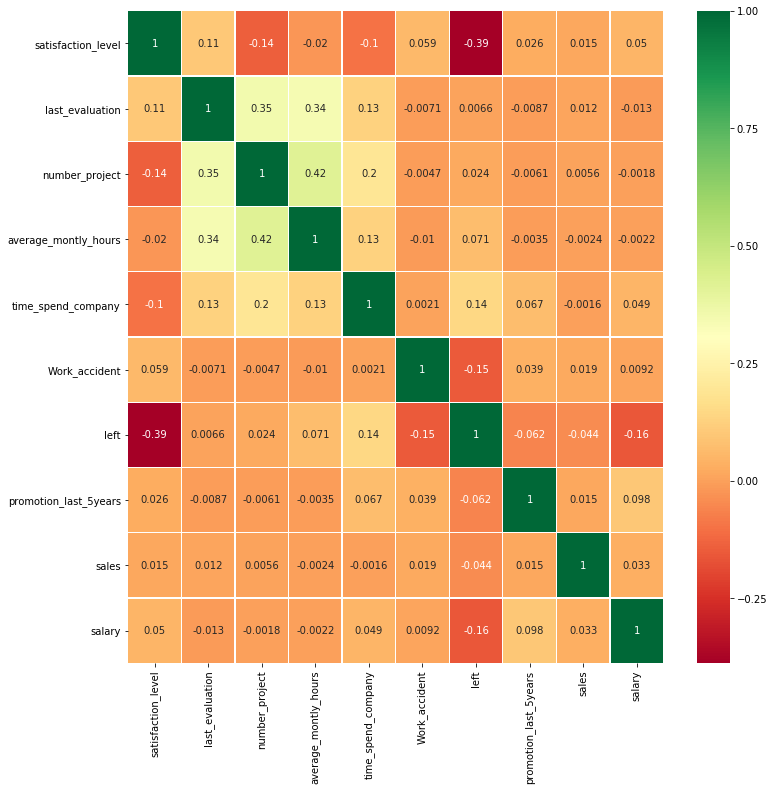

In [11]:
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

In [62]:
# как видно из матрицы корреляций сильных зависимостей между переменными нет

4.Визуализировать несколько взаимосвязей между переменными.

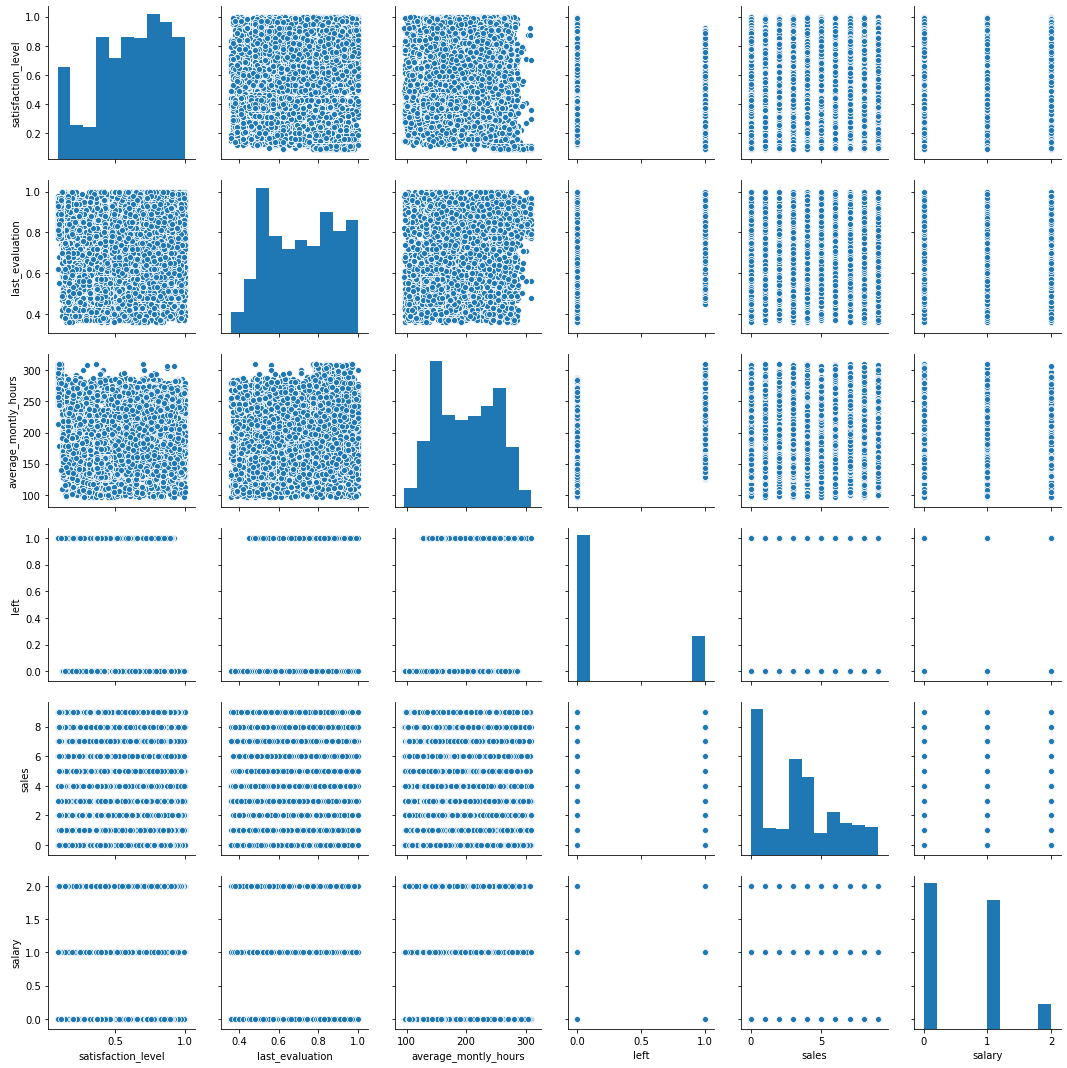

In [106]:
sns.pairplot(df_new, vars=['satisfaction_level', 'last_evaluation', 
       'average_montly_hours',  'left', 'sales', 'salary'], kind="scatter")

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [71]:
# по распределениям на визуализации видим, что нормально распределенных переменных у нас нет
# дополнительно делаем проверку на нормальность
# но для простоты принимаем, что переменные распределены нормально
print(stats.shapiro(df.average_montly_hours))
print(stats.shapiro(df.last_evaluation))

(0.963361382484436, 0.0)
(0.9522111415863037, 0.0)


In [14]:
# формируем выборки и проверяем размерность
low_salary = df[df['salary'] == 'low']['last_evaluation']
medium_salary = df[df['salary'] == 'medium']['last_evaluation']
print('low: ', len(df[df['salary'] == 'low']))
print('medium: ', len(df[df['salary'] == 'medium']))

low:  7316
medium:  6446


In [15]:
# sampling
low_salary = low_salary.sample(5000)
medium_salary = medium_salary.sample(5000)

In [16]:
# проверяем дисперсии
statistics.variance(low_salary), statistics.variance(medium_salary)

(0.02973999231446289, 0.02936923176235247)

In [18]:
# выдвигаем гипотезу о том, что результаты последней оценки для сотрудников с низкой и средней зарплатой равны
# проводим тест
print(stats.ttest_ind(low_salary, medium_salary))

Ttest_indResult(statistic=-0.07445559494718387, pvalue=0.9406493626993221)


p-value > 0.05, нет оснований отклонять нулевую гипотезу, считаем, что в результатах оценки нет статистически значимых отличий

In [19]:
# выдвигаем гипотезу о том, что среднее время работы в течение месяца у сотрудников с низким уровнем удовлетворенности
# и с высоким, не отличается
low_level = df[df['satisfaction_level'] < 0.4]['average_montly_hours']
high_level = df[df['satisfaction_level'] > 0.6]['average_montly_hours']
print('low: ', len(df[df['satisfaction_level'] < 0.4]))
print('medium: ', len(df[df['satisfaction_level'] > 0.6]))

low:  2915
medium:  8270


In [20]:
# sampling
low_level = low_level.sample(2500)
high_level = high_level.sample(2500)

In [21]:
# проверяем дисперсии
statistics.variance(low_level), statistics.variance(high_level)

(3824.202682513005, 1940.807237935174)

In [22]:
# проводим тест
print(stats.ttest_ind(low_level, high_level, equal_var=False))

Ttest_indResult(statistic=3.1577424137751944, pvalue=0.0016004389361134455)


p-value < 0.05, значит отвергаем нулевую гипотезу и признаем различия среднего времени работы в месяц у сотрудников с низким и высоким уровнем удовлетворенности статистически значимыми

6.Рассчитать сколько работников работает в каждом департаменте.

In [124]:
count_employees = df.groupby(df['sales']).count().reset_index()[['sales', 'left']]

In [127]:
count_employees.rename(columns={'left': 'count_employees'}, inplace=True)
count_employees.sort_values('count_employees')

,sales,count_employees
4,management,630
3,hr,739
2,accounting,767
1,RandD,787
5,marketing,858
6,product_mng,902
0,IT,1227
8,support,2229
9,technical,2720
7,sales,4140


7.Показать распределение сотрудников по зарплатам.

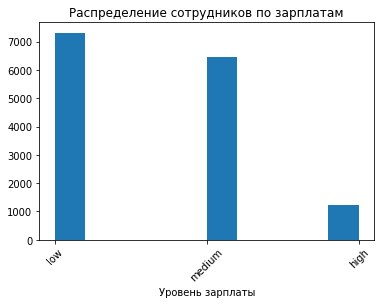

In [10]:
from pylab import *
plt.hist(df_new['salary'])
plt.xlabel('Уровень зарплаты')
plt.title('Pаспределение сотрудников по зарплатам')
xticks(range(3), ['low', 'medium', 'high'], rotation = 45)
plt.show()

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [22]:
# формируем сводную таблицу с количеством сотрудников по отделам и зарплатам
df_pivot_table = df.pivot_table(index='sales', columns='salary', values='last_evaluation', aggfunc='count')
df_pivot_table

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


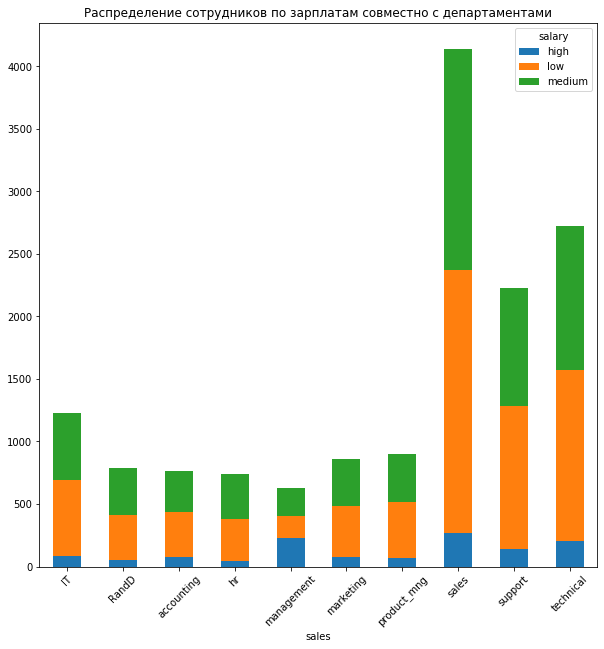

In [23]:
df_pivot_table.plot(kind = 'bar',  rot=45, stacked=True, figsize=(10,10))
plt.title('Pаспределение сотрудников по зарплатам совместно с департаментами')
plt.show()

In [118]:
# за исключением отдела management распределение зарплат по отделам следующее: 
# примерно по 10% сотрудников с высокой зарплатой, и по 45% с низкой и средней.
# а в отделе management около 40% сотрудников имеют высокую зарплаты, и по 30% среднюю и низкую

9.Сколько сотрудников покинули компанию.

In [27]:
print('Покинул компанию ', len(df[df['left'] == 1]), 'сотрудник')

Покинул компанию  3571 сотрудник


10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [28]:
# 1. Т.к. на матрице корреляций видим зависимость между увольнением и уровнем удовлетворенности, то 
# выдвигаем гипотезу о том, что уровень удовлетворенности у покинувших компанию сотрудников и
# сотрудников, продолжающих работать в компании, не отличается

In [30]:
# делаем проверку на нормальность - данные распределены не нормально, но для простоты принимаем нормальное распределение данных
print(stats.shapiro(df.satisfaction_level))

(0.9518948793411255, 0.0)


In [31]:
# формируем выборки и проверяем размерность
left_true = df[df['left'] == 1]['satisfaction_level']
left_false = df[df['left'] == 0]['satisfaction_level']
print('уволенные: ', len(df[df['left'] == 1]))
print('продолжающие работать: ', len(df[df['left'] == 0]))

уволенные:  3571
продолжающие работать:  11428


In [32]:
# sampling
left_true = left_true.sample(3571)
left_false = left_false.sample(3571)

In [33]:
# проверяем дисперсии
statistics.variance(left_true), statistics.variance(left_false)

(0.06966085873834273, 0.04655403514304069)

In [35]:
# проводим t-test для независимых выборок
print(stats.ttest_ind(left_true, left_false, equal_var=False))

Ttest_indResult(statistic=-39.2388790517368, pvalue=4.846242572931489e-304)


In [37]:
# т.к. данные распределены не нормально, проверяем на подготовленном наборе гипотезу с помощью критерия Манна-Уитни, результат
# получаем такой же - p-value стремится к нулю
u, p_value = stats.mannwhitneyu(left_true, left_false)
print(p_value)

3.4808689986105155e-284


Значение p-value близко к нулю, значит мы можем отклонить нулевую гипотезу и сказать, что уровень удовлетворенности уволенных сотрудников отличается от уровня удовлетворенности продолжающих работать сотрудников.

In [38]:
# 2. С помощью однофакторного дисперсионного анализа с применением множественного теста ANOVA проверим гипотезу:
# уровень зарплаты (низкая, средняя и высокая) не влияет на увольнение

In [60]:
print(len(df_new[df_new['salary'] == 0]), len(df_new[df_new['salary'] == 1]), len(df_new[df_new['salary'] == 2]))

7316 6446 1237


In [61]:
salary_low = salary_low.sample(1237)
salary_medium = salary_medium.sample(1237)

In [62]:
salary_low = df_new[df_new['salary'] == 0]['left']
salary_medium = df_new[df_new['salary'] == 1]['left']
salary_high = df_new[df_new['salary'] == 2]['left']

stats.f_oneway(salary_low, salary_medium, salary_high)

F_onewayResult(statistic=195.54449374860312, pvalue=1.4608629258860592e-84)

Получили p-value близкое к 0, значит считаем, что между выборками есть различия, и уровень зарплаты влияет на решение покинуть компанию или остаться

In [114]:
# далее для проверки гипотезы: "соотношение уволенных с низкой зарплатой и с высокой не отличается" 
# будем использовать Хи-квадрат Пирсона, т.к. выборки качественные

In [110]:
# для применения критерия столбец с пометкой об увольнении переводим к строковому типу
df['left'] = df['left'].apply(lambda x: '1' if x == 1 else '0')

In [104]:
# формируем выборкy с зарплатами
hi_salary_low_high = df[(df['salary'] == 'low') | (df['salary'] == 'high')]

In [115]:
# строим таблицу сопряженности
pd.crosstab(hi_salary_low_high['salary'], hi_salary_low_high['left'])

left,0,1
salary,,
high,1155,82
low,5144,2172


In [117]:
table = [ [ 1155, 82], [ 5144, 2172 ] ]

chi2, prob, df, expected = scipy.stats.chi2_contingency(table)

output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format( chi2, df, prob))


test Statistics: 288.7028461694785
degrees of freedom: 1
p-value: 9.532274528428573e-65



Полученное p-value дает возможность отклонить нулевую гипотезу, значит есть различия в соотношении между уволенными с низкой зарплатой и с высокой